# Decision Tree
> - Load **arff** data named **churn.arff** & transform it into **pd.DataFrame**.  
> - Preprocess the data: Drop some of the variables.  
> - Split it into $x$ and $y$.  
> - Apply ```sklearn.tree``` to $y$.  
> - Install ```IPython``` and ```pydot``` via **Anaconda prompt** for plotting.  

In [2]:
from scipy.io import arff
data = arff.loadarff('churn.arff')

import pandas as pd
df = pd.DataFrame(data[0])

/Volumes/GoogleDrive/My Drive/Teaching/PG_Python/Data


In [3]:
df.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
0,b'zero',31953.0,0.0,6.0,313378.0,161.0,0.0,4.0,b'unsat',b'little',b'no',b'STAY'
1,b'one',36147.0,0.0,13.0,800586.0,244.0,0.0,6.0,b'unsat',b'little',b'considering',b'STAY'
2,b'one',27273.0,230.0,0.0,305049.0,201.0,16.0,15.0,b'unsat',b'very_little',b'perhaps',b'STAY'
3,b'zero',120070.0,38.0,33.0,788235.0,780.0,3.0,2.0,b'unsat',b'very_high',b'considering',b'LEAVE'
4,b'one',29215.0,208.0,85.0,224784.0,241.0,21.0,1.0,b'very_unsat',b'little',b'never_thought',b'STAY'


In [4]:
df.columns

Index(['COLLEGE', 'INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE', 'HANDSET_PRICE',
       'OVER_15MINS_CALLS_PER_MONTH', 'AVERAGE_CALL_DURATION',
       'REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL',
       'CONSIDERING_CHANGE_OF_PLAN', 'LEAVE'],
      dtype='object')

In [5]:
d1 = df.drop(['OVER_15MINS_CALLS_PER_MONTH','REPORTED_SATISFACTION','REPORTED_USAGE_LEVEL',
              'CONSIDERING_CHANGE_OF_PLAN'], axis=1)

In [6]:
d1.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,LEAVE
0,b'zero',31953.0,0.0,6.0,313378.0,161.0,4.0,b'STAY'
1,b'one',36147.0,0.0,13.0,800586.0,244.0,6.0,b'STAY'
2,b'one',27273.0,230.0,0.0,305049.0,201.0,15.0,b'STAY'
3,b'zero',120070.0,38.0,33.0,788235.0,780.0,2.0,b'LEAVE'
4,b'one',29215.0,208.0,85.0,224784.0,241.0,1.0,b'STAY'


In [7]:
dummy1 = pd.get_dummies(d1['COLLEGE'], prefix='lalala')
dummy1.head()

,lalala_b'one',lalala_b'zero'
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0


In [8]:
dummy1 = pd.get_dummies(d1['COLLEGE'], prefix='lalala',drop_first=True)
dummy1.head()

,lalala_b'zero'
0,1
1,0
2,0
3,1
4,0


In [9]:
d2 = ['COLLEGE','LEAVE']
for i in d2:
    dummies = pd.get_dummies(d1[i], prefix=i,drop_first=True)
    d1 = pd.concat([d1, dummies], axis=1)
    d1.drop(i, axis=1, inplace=True)
d1.head()    

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,COLLEGE_b'zero',LEAVE_b'STAY'
0,31953.0,0.0,6.0,313378.0,161.0,4.0,1,1
1,36147.0,0.0,13.0,800586.0,244.0,6.0,0,1
2,27273.0,230.0,0.0,305049.0,201.0,15.0,0,1
3,120070.0,38.0,33.0,788235.0,780.0,2.0,1,0
4,29215.0,208.0,85.0,224784.0,241.0,1.0,0,1


In [10]:
# Rename 2 columns
col_ind = [6,7]
new_col = ['College','Leave']
old_col = d1.columns[col_ind]
d1.rename(columns=dict(zip(old_col,new_col)), inplace=True)
d1.head()

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,College,Leave
0,31953.0,0.0,6.0,313378.0,161.0,4.0,1,1
1,36147.0,0.0,13.0,800586.0,244.0,6.0,0,1
2,27273.0,230.0,0.0,305049.0,201.0,15.0,0,1
3,120070.0,38.0,33.0,788235.0,780.0,2.0,1,0
4,29215.0,208.0,85.0,224784.0,241.0,1.0,0,1


## Modeling

In [11]:
y = d1['Leave']
x = d1.drop(['Leave'],axis=1)

In [12]:
from sklearn.tree import DecisionTreeClassifier
churn = DecisionTreeClassifier(criterion="entropy",
                               min_samples_split=2500,
                               min_samples_leaf=2000)  # max_depth = 4

churn.fit(x,y)
churn_pred = churn.predict(x)

In [13]:
from sklearn.metrics import confusion_matrix,classification_report,precision_score
print(classification_report(y,churn_pred))

              precision    recall  f1-score   support

           0       0.65      0.83      0.73      9852
           1       0.77      0.57      0.65     10148

   micro avg       0.69      0.69      0.69     20000
   macro avg       0.71      0.70      0.69     20000
weighted avg       0.71      0.69      0.69     20000



In [14]:
print(confusion_matrix(y,churn_pred))
accuracy = (7240+7597)/20000
out = 'The accuracy rate is {}'.format(accuracy)
print(out)

[[8130 1722]
 [4398 5750]]
The accuracy rate is 0.74185


## New Python Module
> Open a new *Anaconda Prompt* in Window or new *Terminal* in Mac.  
> Enter ```pip install pydot```.  

In [15]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot

In [16]:
features = list(x)

In [17]:
# features
dot_data = StringIO()  
export_graphviz(churn, out_file=dot_data, feature_names=features, filled=True, rounded=True)

In [18]:
graph = pydot.graph_from_dot_data(dot_data.getvalue())  

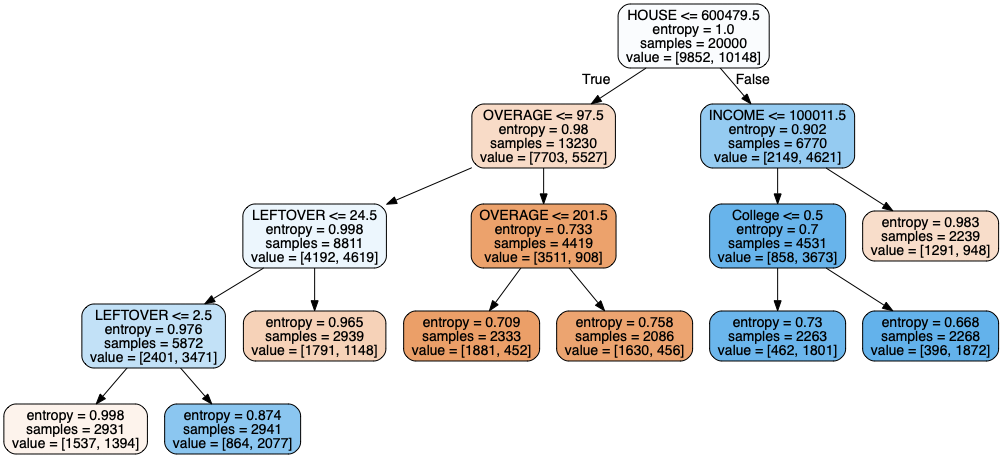

In [19]:
Image(graph[0].create_png())